# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 머신러닝!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 네 번째 마을 '딥러닝' 마을에 도착했습니다.
* 그럼, 지금부터 네 번째 드래곤볼을 찾아볼까요?

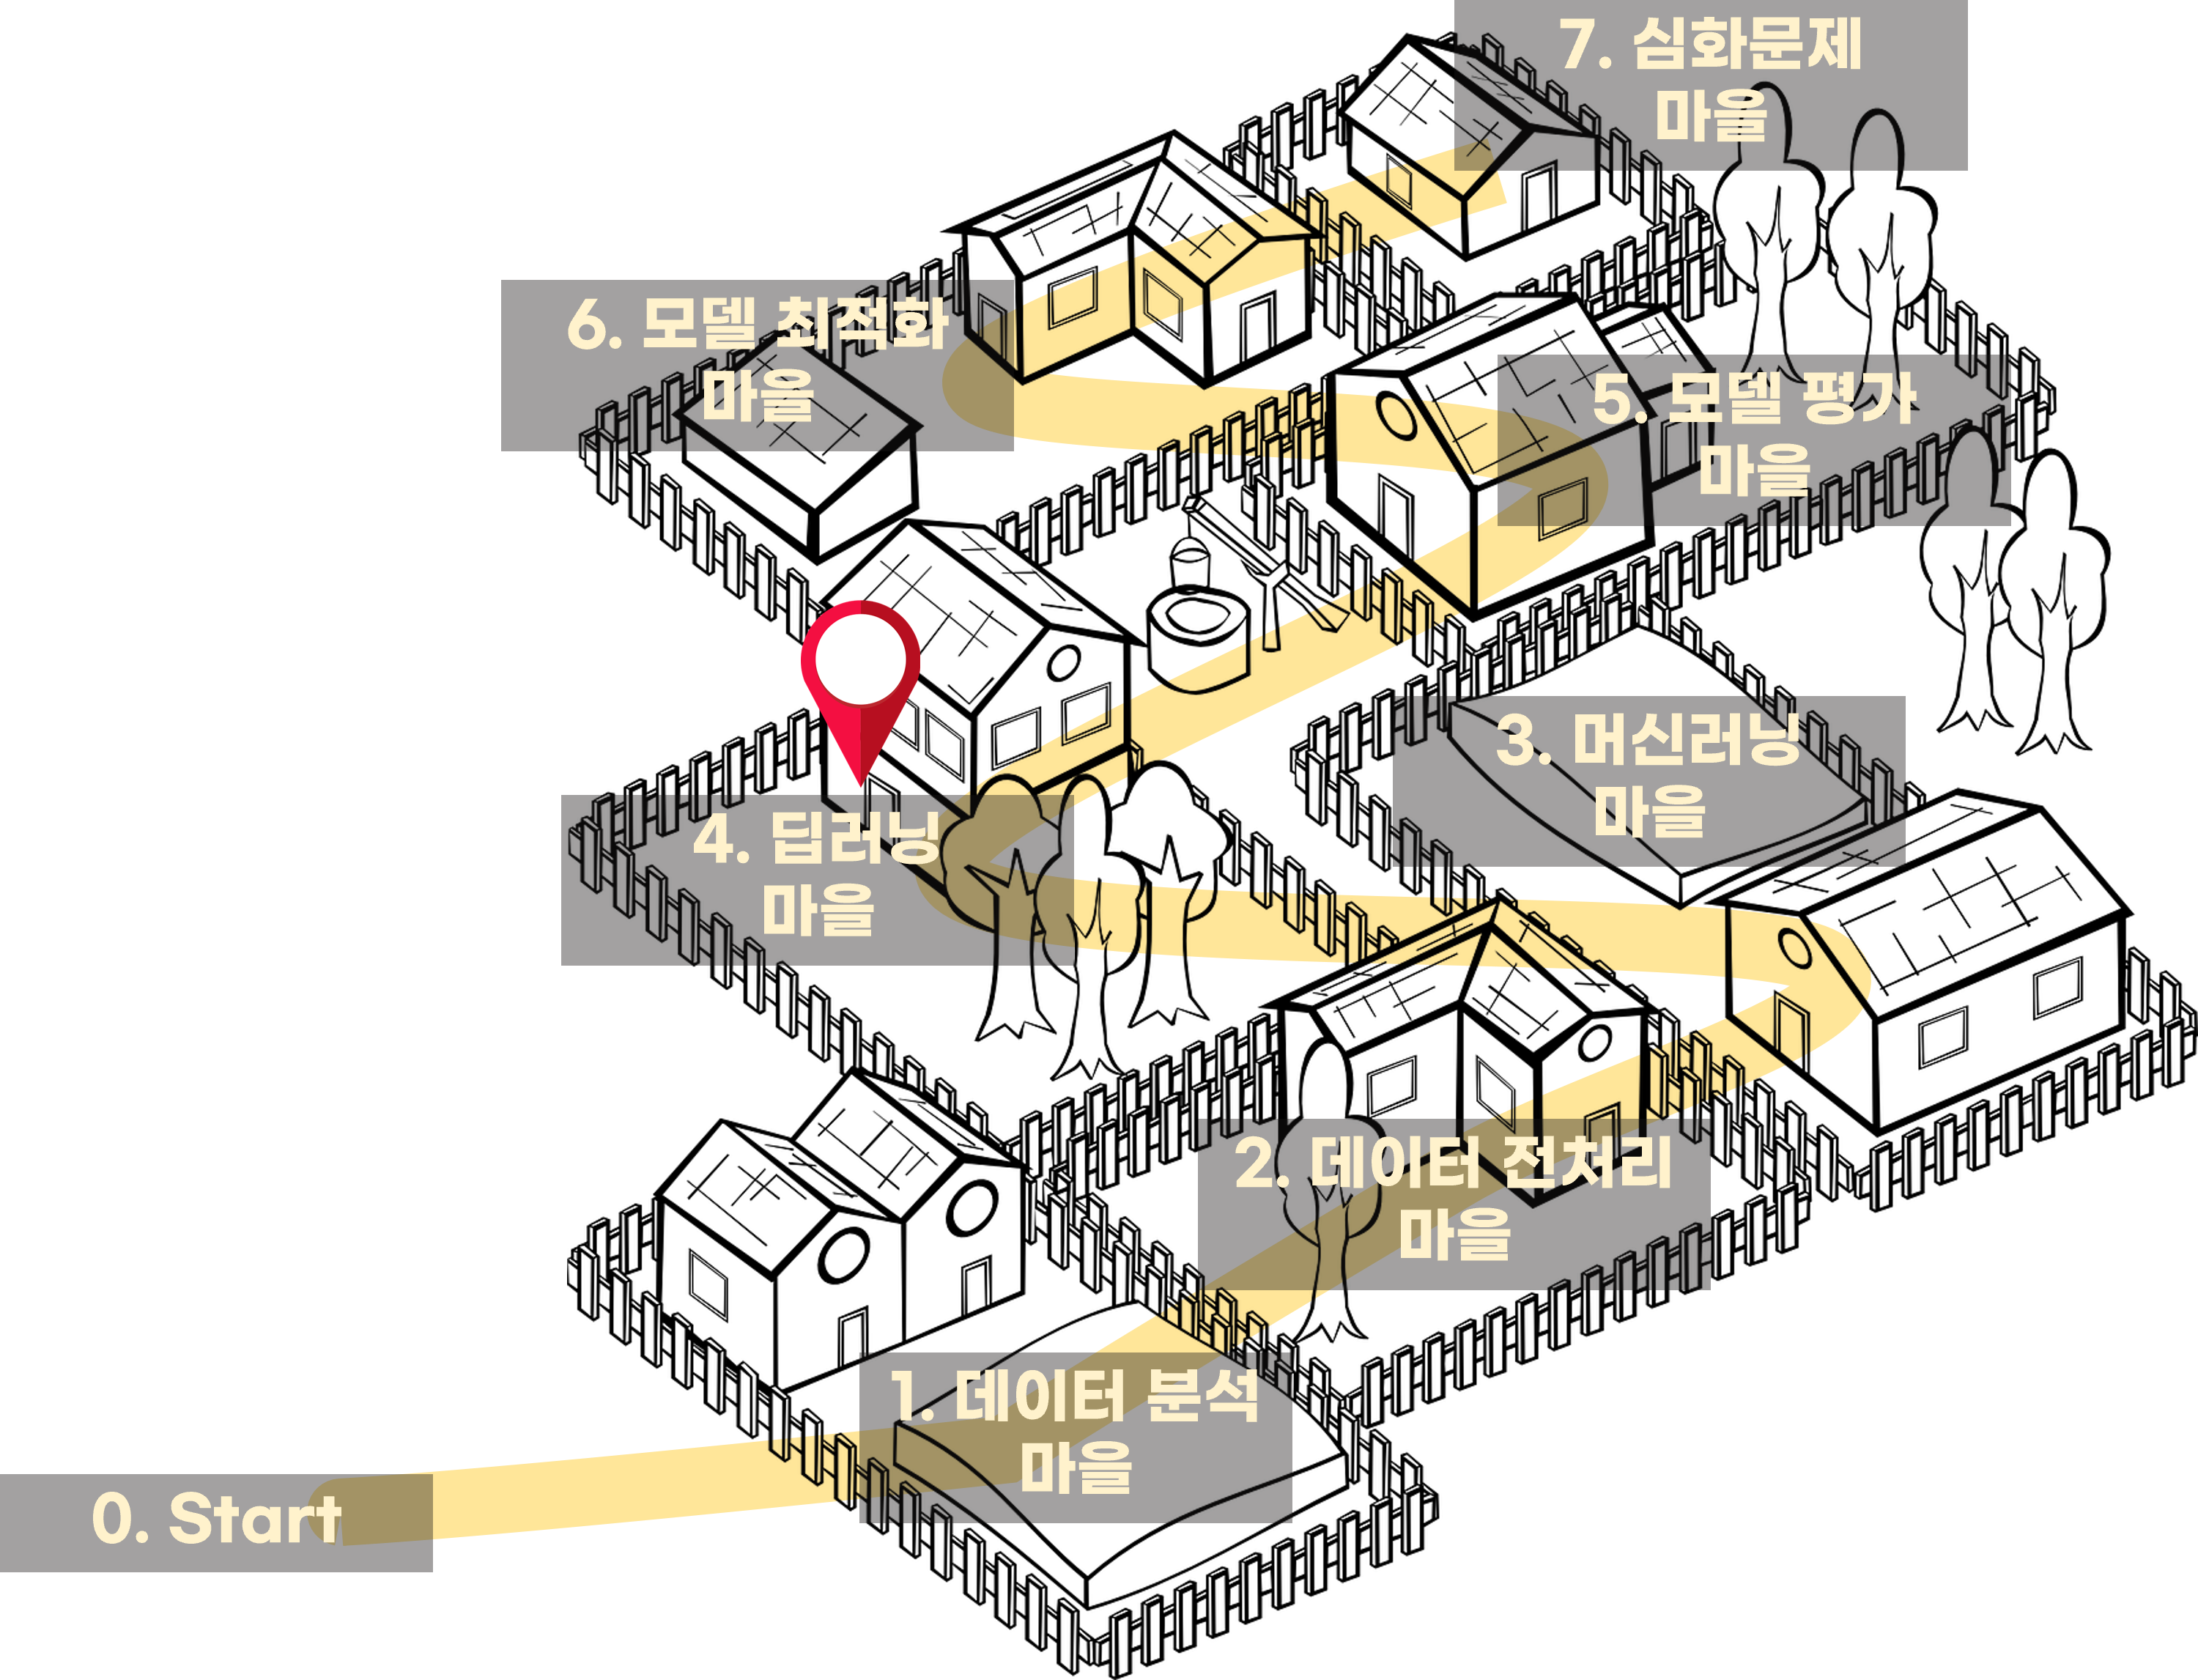

### [상황] 네 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn xgboost gspread oauth2client

In [2]:
# ID를 입력해주세요.
# ID는 aivle 이메일의 아이디 d로 시작하는 7글자(예를 들어 d011001)
ID = "a021018"

---

# (실습준비) 데이터 불러오기부터

In [3]:
import pandas as pd

# 학습/평가 데이터 로딩
df_feature = pd.read_csv("add_data/onenavi_train_feature.csv",sep="|")
df_target = pd.read_csv("add_data/onenavi_train_target.csv",sep="|")

In [4]:
### Train/Test Data Split
from sklearn.model_selection import train_test_split

# train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.20, random_state=42)

# 1. 회귀문제에 딥러닝 모델 적용하기
* 딥러닝은 머신 러닝의 특정한 한 분야로서 연속된 층(layer)에서 점진적으로 의미 있는 표현을 배우는 데 강점이 있으며, 데이터로부터 표현을 학습하는 새로운 방식입니다.
* 즉 계층적 표현 학습이라고도 할 수 있습니다.

#### [실습문제1] 딥러닝_1
* 아래 그림을 기준으로 tensorflow 라이브러리를 활용한 모델을 만들어보세요.
* dense와 dense_1의 activation은 'relu'으로 지정해주세요.
* 모델 compile 시 loss는 'mse', optimizer는 'adam', metrics는 'mae'와 'mse'로 지정해주세요.
* 모델 학습 시에는 콜백 함수 두 가지를 적용해주세요.(EarlyStopping : val_loss기준 patience 10, ModelCheckpoint : val_loss기준 save_weights_only, save_best_only)
* 단서 : 여기서 만든 모델의 Total params는? Hint : model.summary()

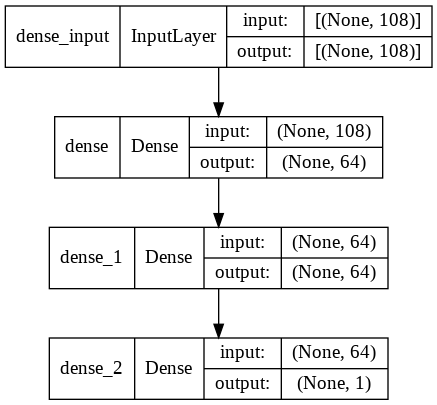

In [44]:
# 아래에 실습코드를 작성하세요.
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
keras.backend.clear_session()

model = keras.Sequential(
    [
        layers.Input(shape=(108,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="linear")
    ]
)

model.compile(loss=keras.losses.MeanSquaredError(),
             optimizer=keras.optimizers.Adam(),
             metrics=['mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6976      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [47]:
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   verbose=1)

In [48]:
cp = ModelCheckpoint(filepath='./checkpoint/{epoch:02d}-{val_loss:.5f}.h5',
                     monitor='val_loss',
                     save_weights_only=True,
                     save_best_only=True)

In [49]:
model.fit(train_x,
    train_y,
    epochs=100,
    verbose=1,
    callbacks=[es, cp],
    validation_data=(test_x, test_y),)

Epoch 1/100
1386/1386 [==============================] - 3s 2ms/step - loss: 563706.9903 - mae: 558.1512 - mse: 563706.9903 - val_loss: 119742.4922 - val_mae: 235.9635 - val_mse: 119742.4922
Epoch 2/100
1386/1386 [==============================] - 3s 2ms/step - loss: 101546.5962 - mae: 224.2634 - mse: 101546.5962 - val_loss: 97875.9297 - val_mae: 209.5050 - val_mse: 97875.9297
Epoch 3/100
1386/1386 [==============================] - 3s 2ms/step - loss: 93376.9621 - mae: 205.3667 - mse: 93376.9621 - val_loss: 89582.8672 - val_mae: 197.8479 - val_mse: 89582.8672
Epoch 4/100
1386/1386 [==============================] - 3s 2ms/step - loss: 81446.5020 - mae: 194.5169 - mse: 81446.5020 - val_loss: 84046.5938 - val_mae: 187.7477 - val_mse: 84046.5938
Epoch 5/100
1386/1386 [==============================] - 3s 2ms/step - loss: 79219.5146 - mae: 185.5875 - mse: 79219.5146 - val_loss: 80392.4062 - val_mae: 182.3525 - val_mse: 80392.4062
Epoch 6/100
1386/1386 [==============================] - 3s

In [19]:
# 아래에 단서를 적어주세요.
단서1 = "11,201"# 단서1을 적어주세요.(문자형으로 적어주세요.)

### 실습2. <u>만들어진 모델를 기반으로 모델파일로 저장해주세요.</u>
#### [실습문제2] 딥러닝_2
* 만들어진 모델를 기반으로 모델파일로 저장해주세요.
* 파일 저장 전에 ModelCheckpoint의 가중치(weights)를 로딩해주세요.
* 저장위치는 model 폴더입니다.
* 파일명은 DeeplearningModel.h5
* 단서 : ModelCheckpoint의 가중치(weights)를 로딩하는 함수는? Hint : l로 시작하는 함수

In [56]:
# 아래에 실습코드를 작성하세요.
model = keras.Sequential(
    [
        layers.Input(shape=(108,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="linear")
    ]
)

model.compile(loss=keras.losses.MeanSquaredError(),
             optimizer=keras.optimizers.Adam(),
             metrics=['mae', 'mse'])

model.load_weights("./checkpoint/best.h5")

In [58]:
model.save('./model/DeeplearningModel.h5')

In [41]:
# 아래에 단서를 적어주세요.
단서2 = "load_weights"# 단서2를 적어주세요.(문자형으로 적어주세요.)

---

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 획득했습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [42]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.fourthModule(ID, 단서1, 단서2)

단서1 정답
단서2 정답
드래곤볼을 획득했습니다.


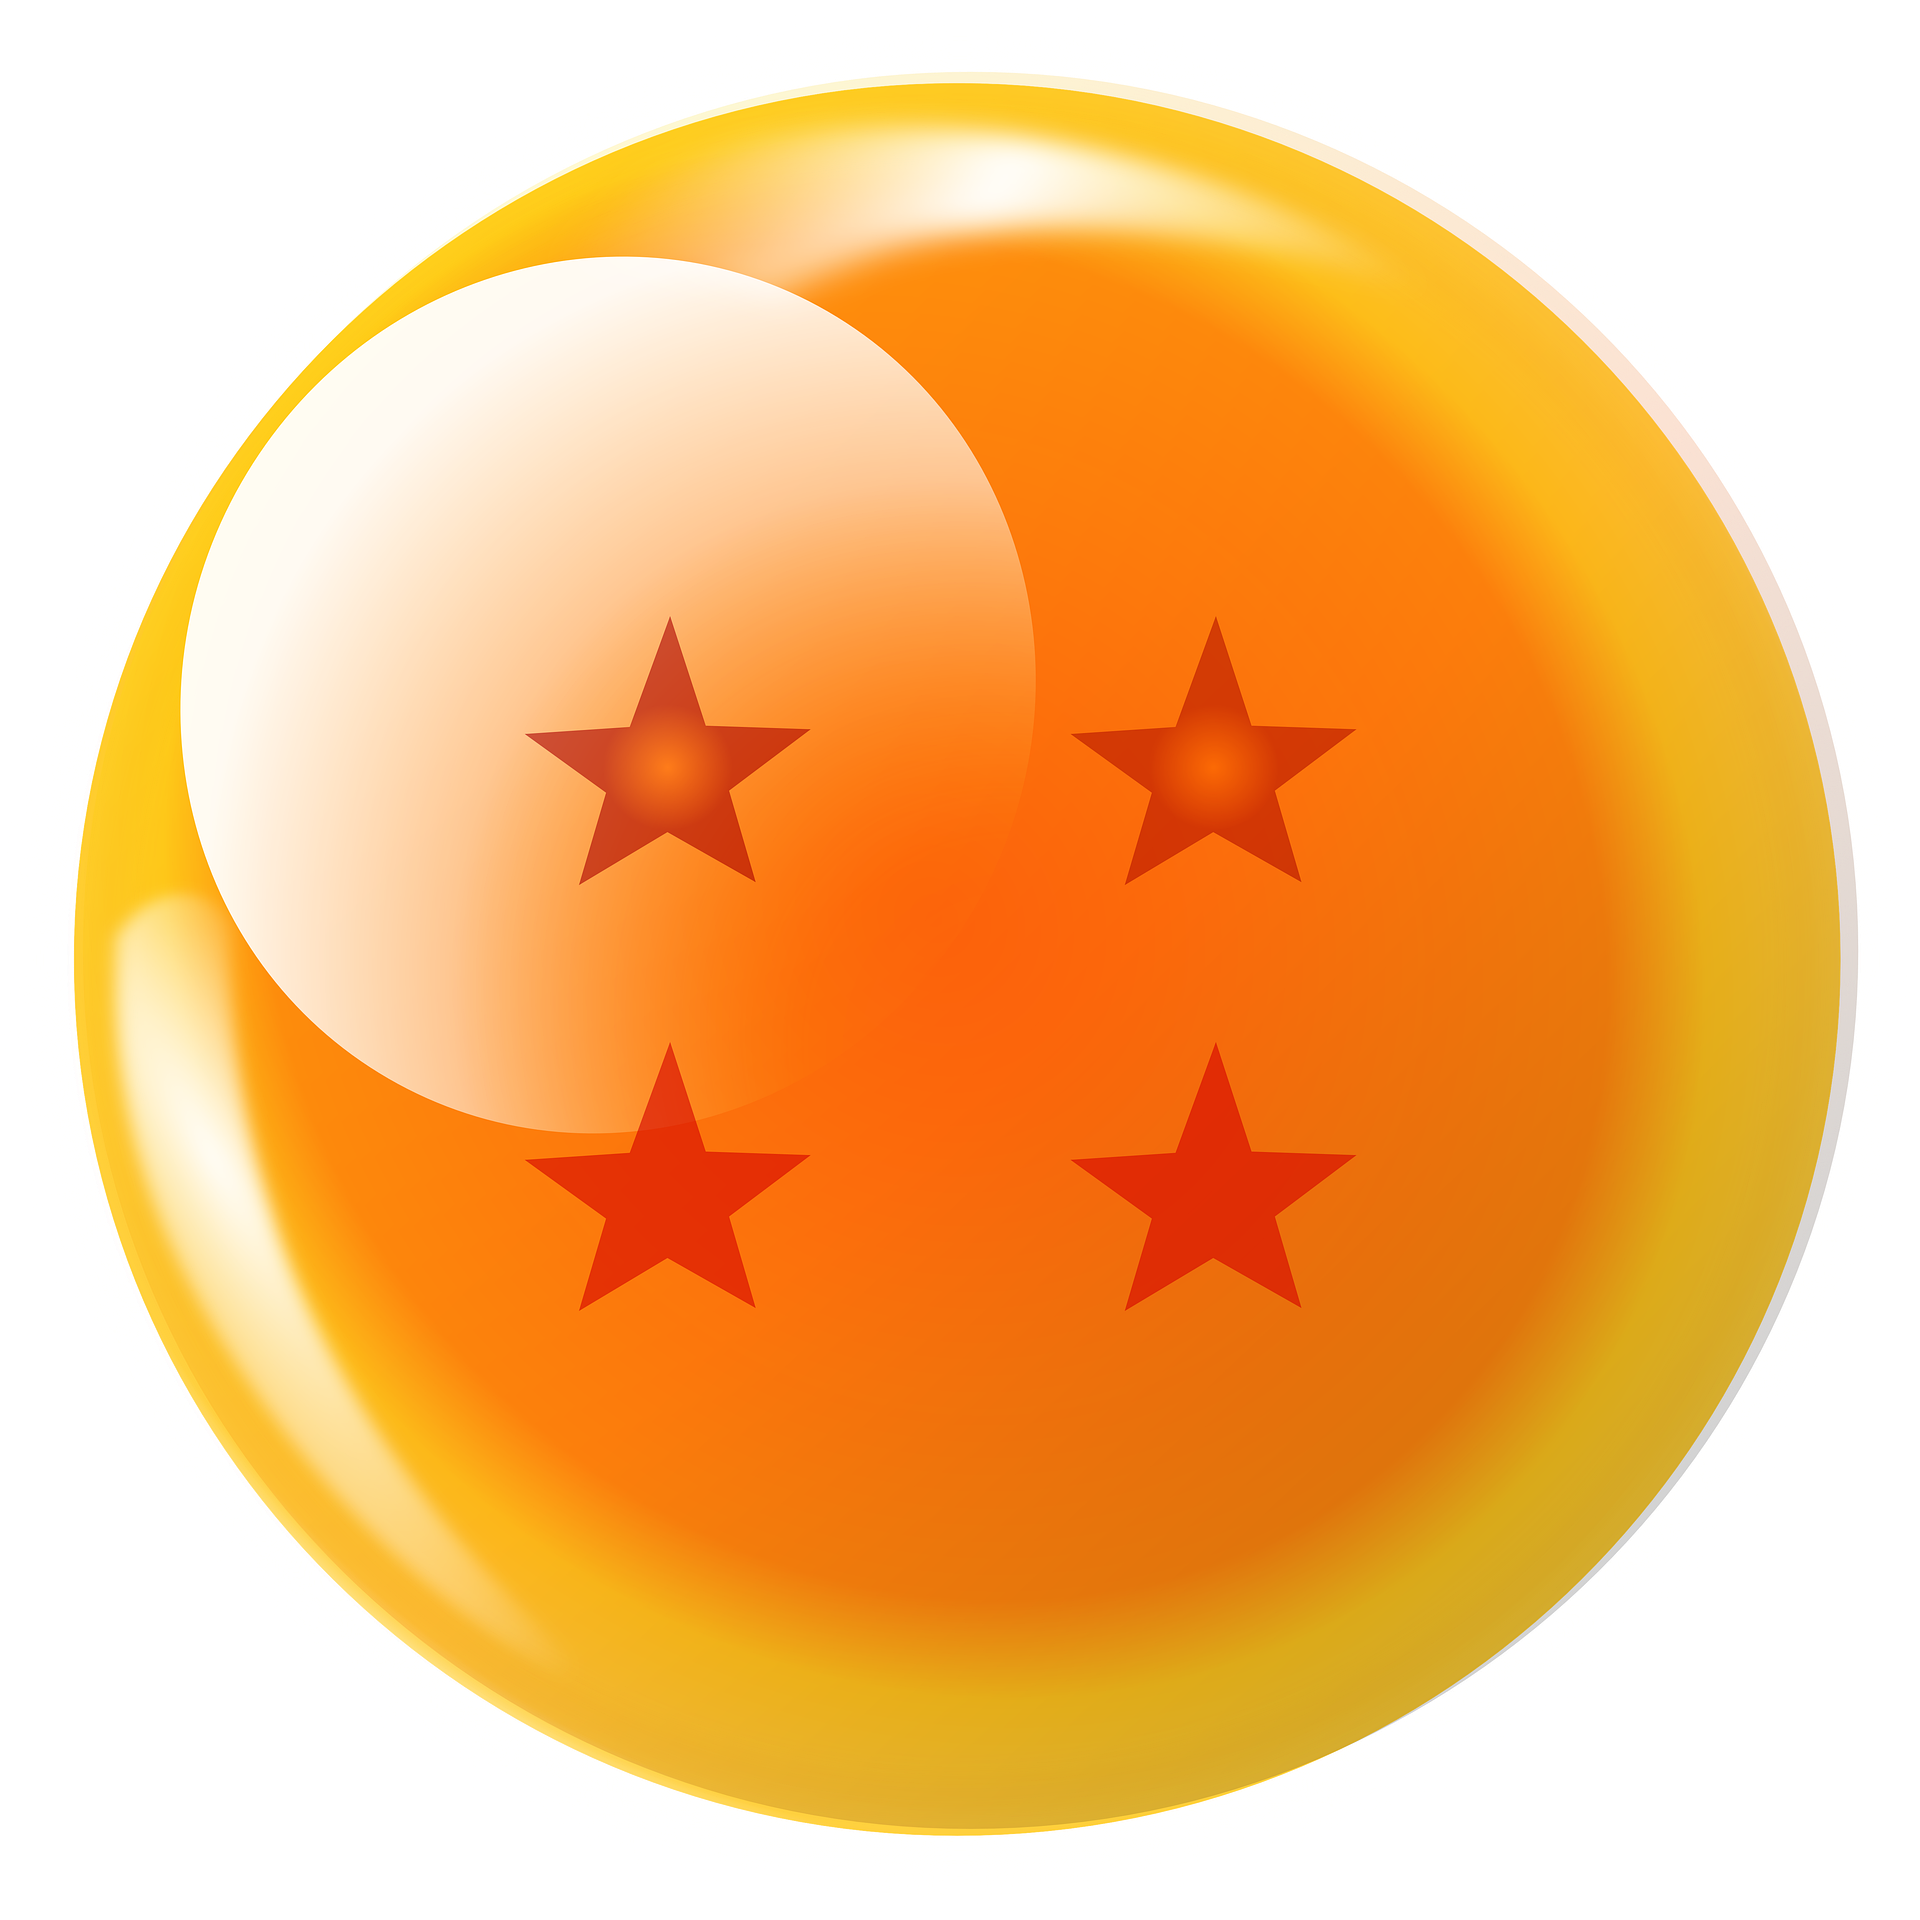

In [43]:
# 확인
from IPython.display import Image
Image("./dragonball/4성구.png", width=300, height=300)